# **The Exploratory Analysis of Innovation Capability at Province-Level in China**

CASA0006: Data Science for Spatial Systems

Student Number: 17064051

Word count: 2147

Repository: https://github.com/zcak/dss

---

## **Index**
### 1. Introduction

### 2. Research Question

### 3. Presentation of Data
##### 3.1 Data Input
##### 3.2 Data Preprossessing
##### 3.3 Descriptive Statistics

### 4. Methodology
##### 4.1 Regression Analysis
##### 4.2 Classification Analysis

### 5. Results

### 6. Conclusion
---

## **1. Introduction**

As `WIPO (2018)` explained, intellectual property (IP) is the property resulting from the creation of people's mind. There is one type of intellectual properties called by 'patent' which protects the monopoly rights of inventors to their creative mind during a certain period of time and in result benefits the inventors from their inventions greatly. As the benefit of patents encourages creativity, it plays an important role in promoting the innovation process of companies even regions by enhancing the capability to develop new products (`ChinaPower 2020`). Over the past decade, the government of China considered it as an important part of national development strategy for pushing the innovation-driven economy and the decision has achieved outstanding results (`Thompson R. (2014)`). Since 2000, there has been rapid growth in the annual number of patent applications in China which accounted for the largest proportion of total number of global patent applications in recent years(`ChinaPower 2020`). 

Chinese patents are classified into three types: utility, invention, and design patent, where utility patents are mainly new solutions / improvements to existing physical products which are similar to Japanese and European utility model patents while invention patents are the patents with highest 'inventiveness' among the three types and can be new physical products or new processes. The design patents represent the creative external design of physical products (`Demy-Colton 2019`). To be noticed, the most representative type of patents for describing Chinese innovation process is usually regarded as `invention patent`, which had the number of applications reaching a peak of 1.54 million with the growth rate of 11.6% in 2018 (`WIPO 2019`). 

Inspired by this, we will focus on the invention patent application to explore the regional innovation ability in China in recent years. We will

1) visualise both the spatial and temporal variation in number of invention patent applications;
2) explore the potential factors which may affect the number of invention patent application;
3) classify the attributes of regions with a large and small number of invention patent application.

--- 

## **2. Research Question**

The research questions are proposed in this paper:

1. How was the number of invention patent application varied both spatially and temporally?

2. Which factors can impact on the number of regional invention patent applications?

3. What are the attributes of regions with a large or small number of invention patent application?


---

## **3. Presentation of Data**

## 3.1 Data Input

To deal with the research questions, we choose the dataset of number of invention patent application in the administrative regions `provinces` of China between 2015 and 2019, which is sourced from [China Statistical Yearbook](http://www.stats.gov.cn/tjsj/ndsj/) 2015-2019. 

Also, as the output of invention patents in provinces is influenced by provincial innovation activities like R&D expenditure (Hagedoorn, J., & Cloodt, M. 2003) and the size of manufacturing industry at province-level (as China is a manufacturing powerhouse), we also choose the raw datasets for potential driving factors containing the ratio of R&D expenditure to GDP and the employment rate in manufacturing industry per 10,000 population by province in China during 2015 - 2019, which are sourced from [China Statistical Yearbook](http://www.stats.gov.cn/tjsj/ndsj/) as well.

The geographic data is for the administrative division of China —— 'province', which is sourced from [DATAV.GEOATLAS](http://datav.aliyun.com/tools/atlas/#&lat=30.316551722910077&lng=106.68898666525287&zoom=3.5).


In [1]:
import numpy as np
import pandas as pd

In [2]:
## Read the data for Granted Patent
patent_filename = pd.read_csv('https://raw.githubusercontent.com/zcak/dss/main/patent.csv')
patent = pd.DataFrame(patent_filename)
patent.head(1)

,Province,2015,2016,2017,2018,2019
0,Anhui,68314,95963,93527,108782,62743


In [3]:
## Read the data for R&D
R_D_filename = pd.read_csv('https://raw.githubusercontent.com/zcak/dss/main/R%26D.csv')
R_D = pd.DataFrame(R_D_filename)
R_D.head(1)

,Province,2015,2016,2017,2018,2019
0,Anhui,2.11,1.52,1.61,1.66,1.55


In [4]:
## Read the data for Employment in Manufacturing
manufacturing_filename = pd.read_csv('https://raw.githubusercontent.com/zcak/dss/main/Manufacturing.csv')
manufacturing = pd.DataFrame(manufacturing_filename)
manufacturing.head(1)

,Province,2015,2016,2017,2018,2019
0,Anhui,339.84,330.49,309.46,288.6,267.4


In [5]:
import geopandas as gpd
## Read the data for China boundary by province, which may take 2 minutes
province = gpd.read_file("https://raw.githubusercontent.com/zcak/dss/main/Map.geojson")
province.to_crs('EPSG:27700').head(1)

,NAME_0,ID_1,NAME_1,ENGTYPE_1,geometry
0,East,1,Anhui,Province,"POLYGON ((6309138.501 9023734.015, 6310296.693..."


In [6]:
province = province.rename(columns = {'NAME_0':'Region','NAME_1':'Province'}).drop(columns = ['ID_1','ENGTYPE_1'])
geometry = province.drop(columns = 'Region')

<AxesSubplot:>

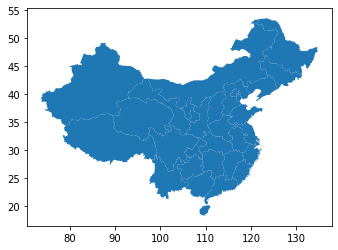

In [7]:
province.plot()

Hint: The full map shows that the dataset contains the complete information for provinces' boundaries.

---

## 3.2 Data Preprossessing

For further analysis, we need to merge these raw datasets into one common dataset by the following steps:
    
1. Deal with the variables named by the value of year shown above (e.g. '2018' and '2019') into a new categorical column called 'Year' (i.e. classify the data by year using only one column). To reach the target, we will 'melt' these dataset firstly.
    
2. Merge these datasets by using '.concat()' with axis of 1 (i.e. horizontally).
    
3. Clean the repeated categorical columns for year and provinces.
    

In [8]:
## Step 1
patent2 = pd.melt(patent, id_vars = ['Province']).rename(columns = {'variable':'Year','value': 'patent','Province':'province'})## To separate from other variables, use capital Y in 'Year'
R_D2 = pd.melt(R_D, id_vars = ['Province']).rename(columns = {'variable':'year','value': 'R_&_D_to_GDP'})
manufacturing2 = pd.melt(manufacturing, id_vars = ['Province']).rename(columns = {'variable':'year','value': 'manufacturing'})

## Step 2
df = pd.concat([patent2, R_D2, manufacturing2], axis=1, sort=False).drop(columns = ['Province'])
df = province.merge(df, right_on="province", left_on="Province", how='inner').drop(columns = 'geometry')
## The reason why we excludes the geodata here is to make the analysis without map run faster.

## Step 3
df = df.drop(columns = ['year','Province'])
df

,Region,province,Year,patent,R_&_D_to_GDP,manufacturing
0,East,Anhui,2015,68314,2.11,339.84
1,East,Anhui,2016,95963,1.52,330.49
2,East,Anhui,2017,93527,1.61,309.46
3,East,Anhui,2018,108782,1.66,288.60
4,East,Anhui,2019,62743,1.55,267.40
...,...,...,...,...,...,...
150,East,Zhejiang,2015,67674,2.64,705.17
151,East,Zhejiang,2016,93254,1.77,690.30
152,East,Zhejiang,2017,98975,1.99,670.51
153,East,Zhejiang,2018,143081,2.04,652.70


### *Description of Data*

The dataset we collat contains these variables:

1. `Year`: Corresponding year of parameters
2. `province`: Name of Administrative Division of China
4. `patent`: Provincial Volume of invention patent application by year
5. `R_&_D_to_GDP`: Ratio of Investment in Research and Development (R&D) to Gross domestic product (GDP)
6. `manufacturing`: Regional Employment Rate in Manufacturing industry in China per 10,000 Population
7. `Region`: Corresponding region of provinces including 'East', 'North', 'South_west', 'North_west', 'South', 'North_east', and 'Center'.

---

## 3.3 Descriptive Statistics

### Temporal Variation in Invention Patent Application-- Scattered Boxplot

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 

Text(0.025, 0.5, 'Number of Invention Patent Application')

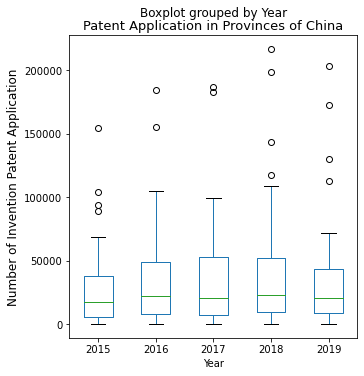

In [10]:
bp = df.boxplot(column='patent', by='Year', grid=False, figsize = (5,5))

for i in [2019,2018,2017,2016,2015]:
    y = df.patent[df.Year==i].dropna()
# Add some random "jitter" to the x-axis
x = np.random.normal(i, 0.05, size=len(y))
plt.title('Patent Application in Provinces of China',fontsize = 13)
plt.plot(x, y, 'r.', alpha=0.1)
plt.subplots_adjust(bottom=0.06)
plt.ylabel('Number of Invention Patent Application', x=0.025, ha='center', size=12)

The scattered boxplot illustrates how the number of regional (provincial) invention patent applications varied between 2015 - 2019.

It can be observed that the median and maximum values (excluding outliers) of applications of provincial invention patents obtained a jump from 2015 to 2016 and then kept the high level until reaching a peak in 2018. However, the number of provincial invention patent applications plunged in 2019 as supervision from the government was conducted to raise the application standards and improve the quality of patents (Xiaoxiang Morning News 2020). 

The outliers in these boxplots can be considered as the signal for invention patent boom in some provinces and cannot be ignored. We will investigate them further by studying the spatial pattern of invention patent application volume.

---

### Spatial Variation in Invention Patent Application -- Choropleth Map

To plot the maps during 2015-2019, we need to 

1) divide the datasets into the sub-datasets for each year;

2) combine the geodata for boundaries of provinces with these sub-datasets;

3) plot the choropleth maps for years of 2015-2019 and visualise the spatial variation in the number of invention patent applications.

In [11]:
df15 = df[df['Year']=='2015']
df16 = df[df['Year']=='2016']
df17 = df[df['Year']=='2017']
df18 = df[df['Year']=='2018']
df19 = df[df['Year']=='2019']

In [12]:
gdf15 = geometry.merge(df15, left_on="Province", right_on="province", how='inner').drop(columns = 'Province')
gdf16 = geometry.merge(df16, left_on="Province", right_on="province", how='inner').drop(columns = 'Province')
gdf17 = geometry.merge(df17, left_on="Province", right_on="province", how='inner').drop(columns = 'Province')
gdf18 = geometry.merge(df18, left_on="Province", right_on="province", how='inner').drop(columns = 'Province')
gdf19 = geometry.merge(df19, left_on="Province", right_on="province", how='inner').drop(columns = 'Province')

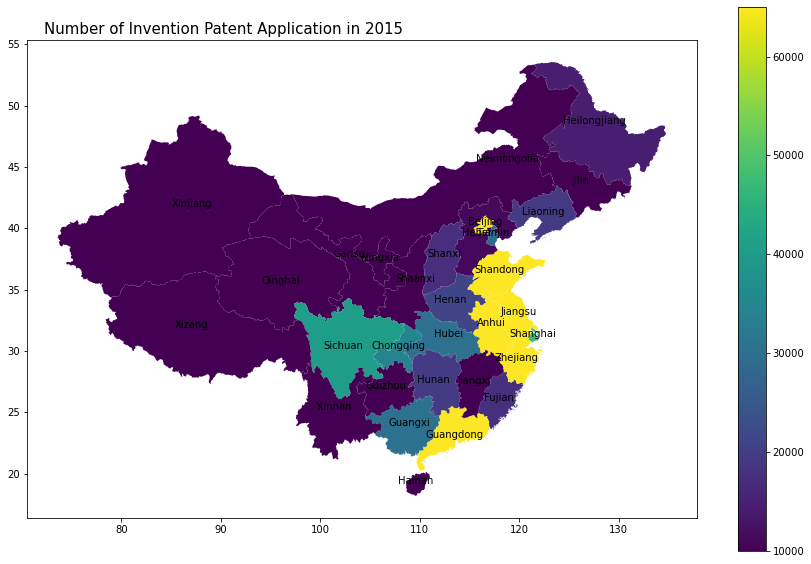

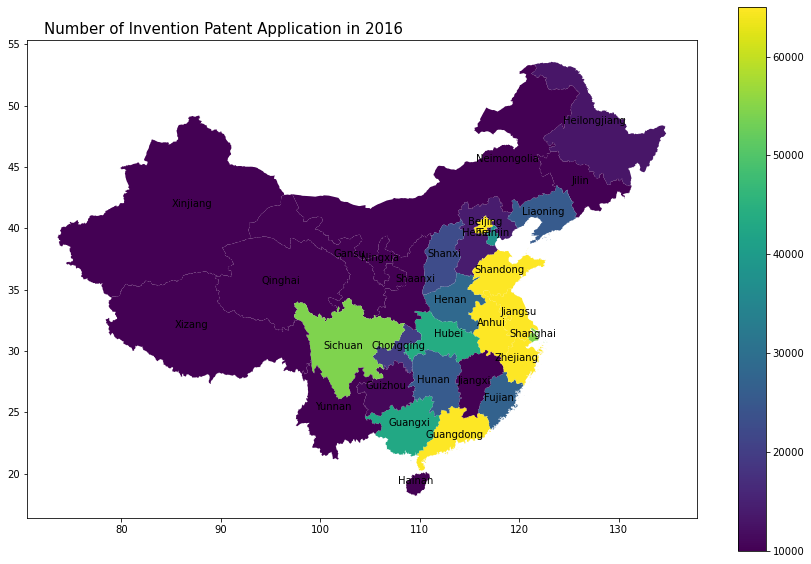

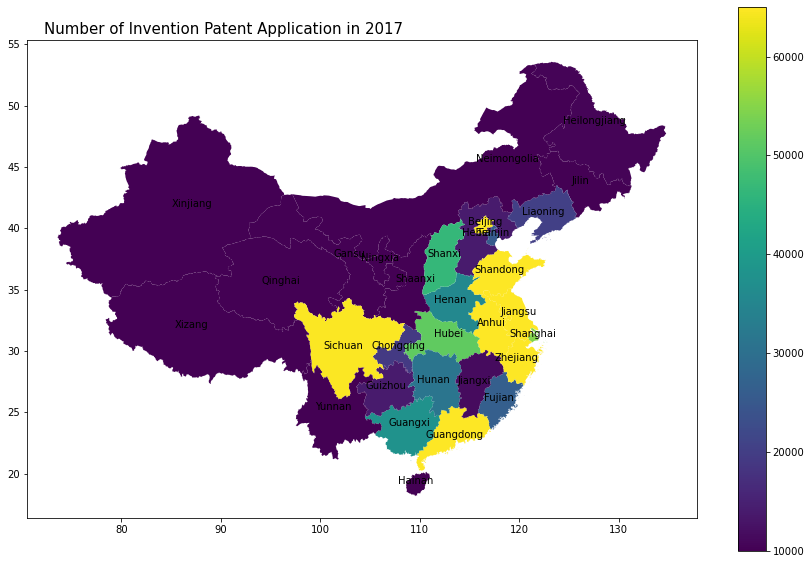

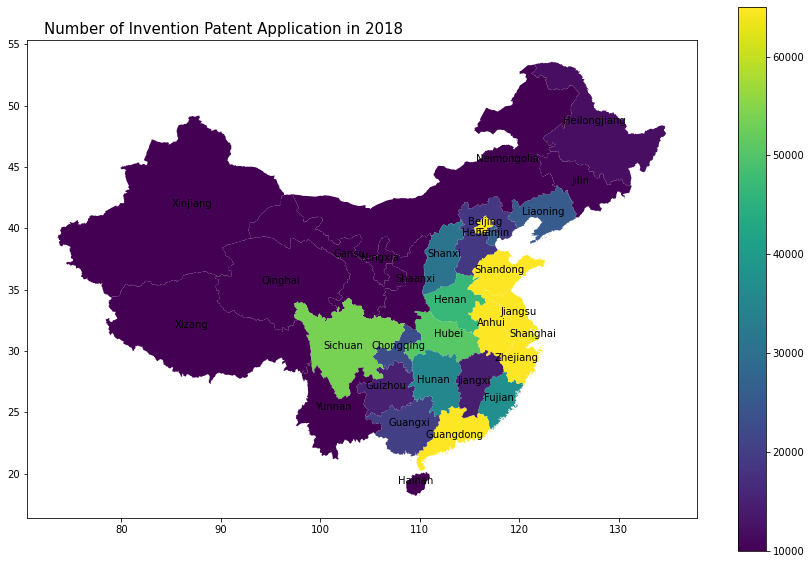

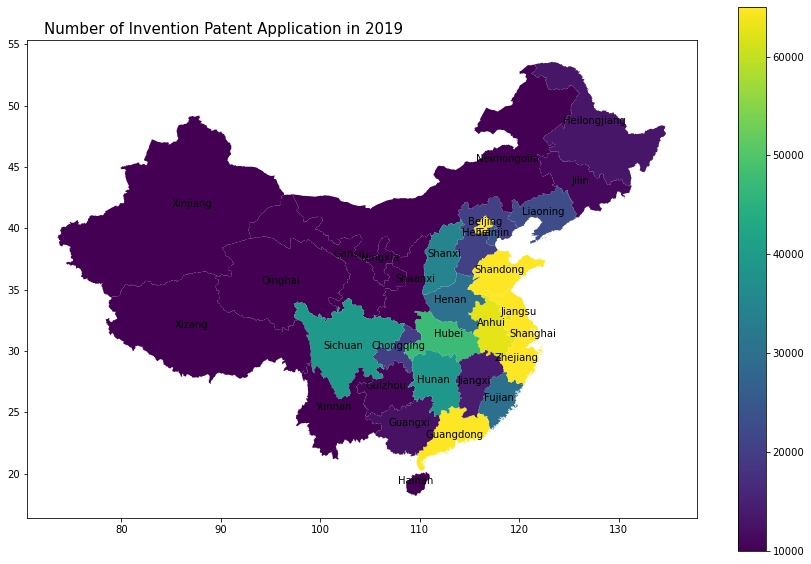

In [13]:
gdf15['coords'] = gdf15['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf15['coords'] = [coords[0] for coords in gdf15['coords']]

gdf16['coords'] = gdf16['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf16['coords'] = [coords[0] for coords in gdf16['coords']]

gdf17['coords'] = gdf17['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf17['coords'] = [coords[0] for coords in gdf17['coords']]

gdf18['coords'] = gdf18['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf18['coords'] = [coords[0] for coords in gdf18['coords']]

gdf19['coords'] = gdf19['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf19['coords'] = [coords[0] for coords in gdf19['coords']]

vmin1, vmax1= 10000, 65000

gdf15.plot(column='patent', legend=True, figsize=(15,10),vmin=vmin1, vmax=vmax1);
plt.title('Number of Invention Patent Application in 2015', x=0.025, ha='left', size=15)
#plt.title('Number of Patent Application in 2015', x=0.025, ha='left', size=15)
for idx, row in gdf15.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],
                 horizontalalignment='center', fontsize = 10)

gdf16.plot(column='patent', legend=True, figsize=(15,10),vmin=vmin1, vmax=vmax1);
plt.title('Number of Invention Patent Application in 2016', x=0.025, ha='left', size=15)
#plt.title('Number of Patent Application in 2016', x=0.025, ha='left', size=15)
for idx, row in gdf16.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],
                 horizontalalignment='center', fontsize = 10)

gdf17.plot(column='patent', legend=True, figsize=(15,10),vmin=vmin1, vmax=vmax1);
plt.title('Number of Invention Patent Application in 2017', x=0.025, ha='left', size=15)
for idx, row in gdf17.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],
                 horizontalalignment='center', fontsize = 10)

gdf18.plot(column='patent', legend=True, figsize=(15,10),vmin=vmin1, vmax=vmax1);
plt.title('Number of Invention Patent Application in 2018', x=0.025, ha='left', size=15)
for idx, row in gdf18.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],
                 horizontalalignment='center', fontsize = 10)

gdf19.plot(column='patent', legend=True, figsize=(15,10),vmin=vmin1, vmax=vmax1);
plt.title('Number of Invention Patent Application in 2019', x=0.025, ha='left', size=15)
for idx, row in gdf19.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],
                 horizontalalignment='center', fontsize = 10)



It can be seen that the province `Sichuan` in south-west China had the obvious increases in invention patent application volume during the first-half of 2015-2019 as its color turns green into yellow and decreased within the latter-half of the period. So is 'Shanxi' which is in the northeastern part of china. And the invention patent application in Shanghai rose from medium to large volume over 60,000 by 2019.

The eastern coastal provinces of China (i.e.  `Jiangsu`, `Shanghai`, `Zhejiang`, `Shandong` and `Anhui`) kept the outstanding performance in invention patent application. So were the southern province `Guangdong` and the capital of China —— `Beijing`. Also, their neighbouring provinces also had larger amount than the other provinces. The phenomenon is possibly resulted from the development of high-tech parks in Beijing, Shanghai and Jiangsu as well as the strong economic performance of the three economic zones in China (i.e. `Yangtze River Delta`, `Pearl River Delta` and `Beijing-Tianjin-Hebei`).

Motivated by the result, we will step into the analysis in driving factors of the number of invention patent application.

---

## **4. Methodology**

In this section, we will conduct the regression and classfication analysis for potential driving factors of the amount of invention patent applications.

## 4.1 Regression Analysis

As mentioned above, the dependent variable is:
* ```patent```: Number of invention patent application of each province of China by year.

And there are four parameters (independent variables) of potential driving factors we will focus on: 
* ```R_&_D_to_GDP```: Yearly Ratio of expenditure in Research and Development (R&D) to GDP by province in China
* ```manufacturing```: Yearly Employment rate in manufacturing industry per 10,000 population by province in China
* ```Region```: Corresponding region of provinces of China (i.e. South_west, Center)
* ```Year```: Corresponding year of parameters.

To be noticed, as `region` and `Year` are catagorical variables, we will create dummy variables for them.


In [14]:
df_reg = df
# Create dummy variables for region and year
Year = pd.get_dummies(df_reg['Year'])
Region = pd.get_dummies(df_reg['Region'])
# Add the dummy variables into the dataset for regression analysis
df_reg = pd.concat([df_reg, Year, Region], axis = 1).drop(columns = ['Year','province','Region'])
df_reg.head(1)

,patent,R_&_D_to_GDP,manufacturing,2015,2016,2017,2018,2019,Center,East,North,North_east,North_west,South,South_west
0,68314,2.11,339.84,1,0,0,0,0,0,1,0,0,0,0,0




As linear regression analysis is assumed that no multicollinearity exists among the independent variables, we will detect both `collinearity` between pairs of these independent variables and `multicollinearity` among the four independent variables by `correlation coefficient` and `variance inflation factor (VIF)`, respectively.

---

### **Correlation Coefficient**

Correlation coefficient is the measure of collinearity between a pair of independent variables which can be visualised by a heatmap of correlation matrix as seen below.

Text(0.5, 1.0, 'Correlation Matrix for Independent Variables')

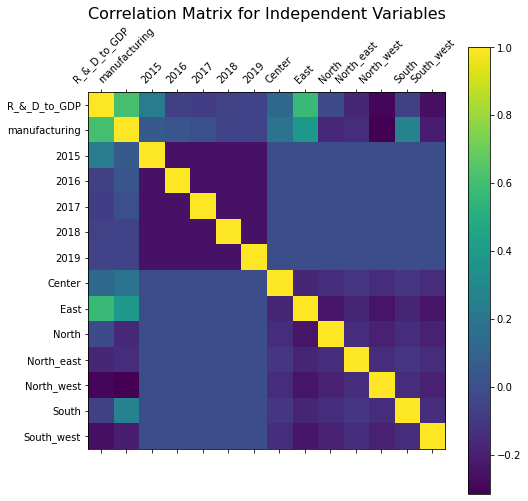

In [15]:
# copy the column for the invention patent application
patent = df_reg['patent']

# create the dataframe containing only the independent variables
independent_reg = df_reg.drop(columns = 'patent')

## draw correlation matrix

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(8, 8))
plt.matshow(independent_reg.corr(), fignum=f.number)
plt.xticks(range(independent_reg.shape[1]), independent_reg.columns, fontsize=10, rotation=45)
plt.yticks(range(independent_reg.shape[1]), independent_reg.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix for Independent Variables', fontsize=16)


The green part on the top left corner implies that there may exist collinearity between the ratio of R&D expenditure to GDP and employment in the manufacturing industry, which may result in multicollinearity. Variance inflation factor (VIF) can help us detect how serious the multicollinearity among the independent variables is.

---

### **Variance Inflation Factor (VIF)**

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove, thresh=2.5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [17]:
# Ysing VIF on the dataset
response = patent # the dataframe for the number of invention patent application
predictors = independent_reg

# This is a list of dummy variables that represent a categorical variable with three or more categories. They should not be removed even if it has a high VIF. 
list_var_not_to_remove = ['R_&_D_to_GDP', '2016', '2017', '2018','2019', 'Center', 'North', 'North_east', 'North_west', 'South', 'South_west']

df_predictors_select_VIF = drop_column_using_vif_(predictors, list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: inf
Dropping: 2015
Max VIF: inf
Dropping: East
Max VIF: 2.1228600836240132
The columns remaining after VIF selection are:
Index(['R_&_D_to_GDP', 'manufacturing', '2016', '2017', '2018', '2019',
       'Center', 'North', 'North_east', 'North_west', 'South', 'South_west'],
      dtype='object')




As the maximum VIF is less than 5, we can assume that there doesn't exist multicollinearity among the independent variables and further step into the linear regression analysis. The reason why we omit the '2015' and 'East' will be explained in the linear regression analysis.

---

### **Linear Regression Analysis: ANCOVA Model**

The method employed in the regression analysis is a Analysis of Covariance (ANCOVA) model as we have both quantitative variables for ratio of R&D expenditure to GDP and provincial employment rate in manufacturing industry as well as categorical variables for corresponding region of provinces and year. The formula of ANCOVA model is:

$Patent_{ij}$ = $\beta_0$ + $\beta_1$ * $R\_$&$\_D\_to\_GDP_{ij}$ + $\beta_2$ * $manufacturing_{ij}$ + $\beta_3$ *                     $2016_{j}$ + $\beta_4$ * $2017_{j}$ + $\beta_5$ * $2018_{j}$ + $\beta_6$ * $2019_{j}$ +                     $\beta_7$ * $Center_{i}$ + $\beta_8$ * $North_{i}$ + $\beta_9$ * $North\_east_{i}$ -                       $\beta_1\_1$ * $North\_west_{i}$ + $\beta_1\_2$ * $South_{i}$ + $\beta_1\_3$ * $South\_west_{i}$
 
, where 

1. $Patent_{ij}$ is the volume of invention patent application in province $i$ and year $j$

2. $R\_$&$\_D\_to\_GDP_{ij}$ and $manufacturing_{ij}$ are ratio of R&D expenditure to GDP and employment rate in manufacturing industry per 10,000 population in province $i$ and year $j$, respectively.

3. $2016_{j}$, $2017_{j}$, $2018_{j}$ and $2019_{j}$ are the categorical variables for years, which can be defined as: 

  $T_j$ = 1 if the year $j$ is $T$; 
  
  $T_j$ = 0 otherwise.

For the categorical variable "Year", we omit 2015 from the five groups of years and create four corresponding dummy variables for 2016, 2017, 2018 and 2019. Hence 2015 is the year to which the other four years are compared in the model.

4. The remaining variables such as $South\_west_{i}$ and $Center_{i}$ are the categorical variable for region of provinces $i$, which can be defined as:

   $R_i$ = 1 if the corresponding region of province $i$ is $R$;
   
   $R_i$ = 0 otherwise.

For the categorical variable "Region" (hint: there are seven regions for provinces), we omit the region 'East' from the seven groups of regions and create six corresponding dummy variables for the remaining regions. Hence the region of east is the region to which the other six regions are compared in the model.

The hypothesis is tested in the analysis:

$H_0$: $\beta_k$ = 0 for k = 1,...,12; 

$H_1$: $\beta_k$ $\neq$ 0 for k= 1,...,12.

For a 95% confidence interval, the null hypothesis will be rejected if p-value $\lt$ 0.05 and the individual coefficient cannot be assumed with statistical significance.

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=response)

LinearRegression()

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

regressor_OLS = sm.OLS(endog=response, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 patent   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     27.26
Date:                Mon, 10 May 2021   Prob (F-statistic):           4.48e-31
Time:                        21:56:45   Log-Likelihood:                -1796.9
No. Observations:                 155   AIC:                             3620.
Df Residuals:                     142   BIC:                             3659.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.878e+04   1.18e+04     -3.273      0.001   -6.22e+04   -1.54e+04
R_&_D_to_GDP   3.164e+04   5317.815      5.949      0.000    2.11e+04    4.21e+04
manufacturing    73.6576     10.203      7.219      0.000      53.488      93.828
2016           2.193e+04   7269.277      3.017      0.003    7562.820    3.63e+04
2017           2.498e+04   7270.176      3.435      0.001    1.06e+04    3.93e+04
2018           3.153e+04   7216.479      4.369      0.000    1.73e+04    4.58e+04
2019           2.618e+04   7193.360      3.640      0.000     1.2e+04    4.04e+04
Center        -2.366e+04   8750.721     -2.704      0.008    -4.1e+04   -6366.374
North          8126.5191   8089.306      1.005      0.317   -7864.511    2.41e+04
North_east    -2402.1733   9834.494     -0.244      0.807   -2.18e+04     1.7e+04
North_west    -3707.0692   9083.681     -0.408      0.684   -2.17e+04    1.42e+04
South          1.454e+04   9665.659      1.504      0.135   -4565.856    3.36e+04
South_west     4032.7044   8877.772      0.454      0.650   -1.35e+04    2.16e+04
==============================================================================
Omnibus:                       26.427   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.568
Skew:                           0.863   Prob(JB):                     5.71e-10
Kurtosis:                       4.900   Cond. No.                     3.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



The coefficient of variables in the table shows the direction and efficiency of the impact of corresponding parameters on the amount of invention patent application. 

We can see that the R$^{2}$ value of 0.697 is high, which means that 69.7% of the variance in the number of invention patent application can be explained by the predictors used and the model performance is good. The result of linear regression analysis will be explained in the next section in details.

---

##  4.2 Classification models

As mentioned above, the number of invention patent applications varied among provinces under the effect of factors like R&D expenditure. Figure out the characteristics (attributes) of provinces with different levels of invention patent application volume will help us predict the regional innovation capability. In this section, we will use `k-Nearest Neighbour` and `Decision Tree` classification models to classify the number of provincial invention patent applications in the most recent year 2019.

We divide the number of invention patent applications into two classes: `Small quantity` and `Large quantity` which is based on the average provincial invention patent applications in China in 2019. In both models, the amount of invention patent applications below average is labeled as class 0 while the amount of invention patent applications above average is labeled as class 1.


In [20]:
## Figure out the dataset for 2019
df_clf = pd.concat([patent2, R_D2, manufacturing2], axis=1, sort=False).drop(columns = ['Province','year'])
clf19 = df_clf[df_clf['Year']=='2019']
clf19 = province.merge(df_clf, right_on="province", left_on="Province", how='inner').drop(columns = ['geometry','Province'])

## Copy the data for amount of invention patent application by province in 2019
patent19 = clf19['patent']

Small_quantity_patent = np.where(patent19 < clf19.patent.mean(), 0, 1)

label_y = Small_quantity_patent

df_patent=clf19.drop(columns = ['patent','Year','province'])
df_patent.head(1)

,Region,R_&_D_to_GDP,manufacturing
0,East,2.11,339.84


In [21]:
from sklearn.feature_extraction import DictVectorizer
dict = df_patent.to_dict('record')
vec = DictVectorizer()  # create the DictVectorizer object
mat = vec.fit_transform(dict)  # execute process on the record dictionaries
array = mat.toarray()

In [22]:
## Now we run the `DictVectorizer` to extract the matrix.
from sklearn.model_selection import train_test_split
train_d, test_d, train_lab, test_lab = train_test_split(array, label_y)

### **k-Nearest Neighbour Classification**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)  
knn.fit(train_d, train_lab) 
knn.score(test_d, test_lab)

0.8205128205128205

In [24]:
prediction = knn.predict(test_d)

In [25]:
from sklearn import metrics
print("Classifcation accuracy: ")
print(metrics.accuracy_score(test_lab, prediction))

Classifcation accuracy: 
0.8205128205128205


In [26]:
confusion_matrix = metrics.confusion_matrix(test_lab, prediction)

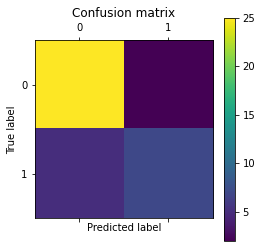

In [27]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
print (metrics.classification_report(test_lab, prediction))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.78      0.58      0.67        12

    accuracy                           0.82        39
   macro avg       0.81      0.75      0.77        39
weighted avg       0.82      0.82      0.81        39



### **Decision Tree Classification Model**

In [29]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()  
decision_tree.fit(train_d, train_lab)
test_decision_tree = decision_tree.predict(test_d)
print (metrics.classification_report(test_lab, test_decision_tree))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.75      0.75      0.75        12

    accuracy                           0.85        39
   macro avg       0.82      0.82      0.82        39
weighted avg       0.85      0.85      0.85        39



The recall for label 1 and accuracy as well as precision for label 1 indicate that the model has a better performance than K-NN approach.

In [30]:
# referenced from https://scikit-learn.org/stable/modules/tree.html#classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
decision_tree = decision_tree.fit(train_d, train_lab)
tree = export_text(decision_tree, feature_names=vec.feature_names_)
print(tree)

|--- R_&_D_to_GDP <= 1.49
|   |--- manufacturing <= 89.35
|   |   |--- class: 0
|   |--- manufacturing >  89.35
|   |   |--- Region=North_east <= 0.50
|   |   |   |--- class: 0
|   |   |--- Region=North_east >  0.50
|   |   |   |--- class: 0
|--- R_&_D_to_GDP >  1.49
|   |--- Region=Center <= 0.50
|   |   |--- Region=North <= 0.50
|   |   |   |--- class: 1
|   |   |--- Region=North >  0.50
|   |   |   |--- class: 0
|   |--- Region=Center >  0.50
|   |   |--- class: 0



## **5. Result**

### Linear Regression Analysis

In [31]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 patent   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     27.26
Date:                Mon, 10 May 2021   Prob (F-statistic):           4.48e-31
Time:                        21:56:46   Log-Likelihood:                -1796.9
No. Observations:                 155   AIC:                             3620.
Df Residuals:                     142   BIC:                             3659.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.878e+04   1.18e+04     -3.273      0.001   -6.22e+04   -1.54e+04
R_&_D_to_GDP   3.164e+04   5317.815      5.949      0.000    2.11e+04    4.21e+04
manufacturing    73.6576     10.203      7.219      0.000      53.488      93.828
2016           2.193e+04   7269.277      3.017      0.003    7562.820    3.63e+04
2017           2.498e+04   7270.176      3.435      0.001    1.06e+04    3.93e+04
2018           3.153e+04   7216.479      4.369      0.000    1.73e+04    4.58e+04
2019           2.618e+04   7193.360      3.640      0.000     1.2e+04    4.04e+04
Center        -2.366e+04   8750.721     -2.704      0.008    -4.1e+04   -6366.374
North          8126.5191   8089.306      1.005      0.317   -7864.511    2.41e+04
North_east    -2402.1733   9834.494     -0.244      0.807   -2.18e+04     1.7e+04
North_west    -3707.0692   9083.681     -0.408      0.684   -2.17e+04    1.42e+04
South          1.454e+04   9665.659      1.504      0.135   -4565.856    3.36e+04
South_west     4032.7044   8877.772      0.454      0.650   -1.35e+04    2.16e+04
==============================================================================
Omnibus:                       26.427   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.568
Skew:                           0.863   Prob(JB):                     5.71e-10
Kurtosis:                       4.900   Cond. No.                     3.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####

As the `VIF` of 2.1228600836240132 is less than 5 and `R$^2$` is 0.697, we can consider that the linear regression model is well-fitted.

The result of linear regression analysis shows that

$Patent_{ij}$ = - $3.878e^4$ + $3.164e^4$ * $R\_$&$\_D\_to\_GDP_{ij}$ + $73.6576$ * $manufacturing_{ij}$ + 
$2.193e^4$ * $2016_{j}$ + $2.498e^4$ * $2017_{j}$ + $3.153e^4$ * $2018_{j}$ + $2.618e^4$ * $2019_{j}$ - $2.366e^4$ * $Center_{i}$

The `ratio of R&D expenditure to GDP` and the `employment rate in manufacturing industry by province` had significantly positive effect on raising the provincial volume of invention patent application as the coefficients of their indicators shown. 

Moreover, it shows that the volume of invention patent application has no obvious regional characteristics except in the center area of China. The temporal variation can be observed, for which the volume of invention patent application achieved the peak in 2018 during the period of 2015-2019.

### Classification Analysis

According to the result of `k-Nearest Neighbour` classification model, 

In [32]:
print (metrics.classification_report(test_lab, prediction))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.78      0.58      0.67        12

    accuracy                           0.82        39
   macro avg       0.81      0.75      0.77        39
weighted avg       0.82      0.82      0.81        39



1) `Accuracy` indicates the percent of provinces are correctly classified regardless of their actual class for the quantity of invention patent application;

2) `Recall for label 1` indicates the percent of provinces receiving more invention patent applications than average are correctly recognised by the classifier;

3) `precision for label 1` represents the proportion of provinces actually receiving more-than-average invention patent applications out of all provinces which are classfied as receiving a 'large quantity' of invention patent applications.

According to the result of Decision Tree classification model,

In [33]:
print (metrics.classification_report(test_lab, test_decision_tree))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.75      0.75      0.75        12

    accuracy                           0.85        39
   macro avg       0.82      0.82      0.82        39
weighted avg       0.85      0.85      0.85        39



1) `Accuracy` indicates the percent of provinces are correctly classified regardless of their actual class for the quantity of invention patent applications;

2) `Recall for label 1` indicates the percent of provinces receiving more invention patent applications than average are correctly recognised by the classifier;

3) `precision for label 1` represents the proportion of provinces actually receiving more-than-average invention patent applications out of all provinces which are classfied as receiving a 'large quantity' of invention patent applications.

The higher values of the three indicators illustrate that Decision Tree classification model has a better performance than kNN approach. We prefer to use the result of decision tree classifier for classification.

In [34]:
print(tree)

|--- R_&_D_to_GDP <= 1.49
|   |--- manufacturing <= 89.35
|   |   |--- class: 0
|   |--- manufacturing >  89.35
|   |   |--- Region=North_east <= 0.50
|   |   |   |--- class: 0
|   |   |--- Region=North_east >  0.50
|   |   |   |--- class: 0
|--- R_&_D_to_GDP >  1.49
|   |--- Region=Center <= 0.50
|   |   |--- Region=North <= 0.50
|   |   |   |--- class: 1
|   |   |--- Region=North >  0.50
|   |   |   |--- class: 0
|   |--- Region=Center >  0.50
|   |   |--- class: 0



The Decision Tree classifier groups the variables and figures out the grouped attributes of provinces which received a larger or smaller number of invention patent applications than average as shown above, where class 0 is for the amount of invention patent applications below average and class 1 is for the amount of invention patent applications over average. It can be seen that regional attributes, development of manufacturing industry as well as investment in R&D can affect people's enthusiasm in invention.

## **6. Conclusion**

In this study，the visualisation of temporal variation of the number of invention patent applications in provinces indicates that number of provincial invention patent applications presented the trend of firstly increase and later decline from 2015 to 2019 due to China's innovation-driven strategy and supervision in standards of invention patent application, respectively. And the spatial pattern of the yearly volume of invention patent applications illustrates that the south-eastern coastal areas of China as well as Beijing and Guangdong kept the large volume of invention patent applications while Sichuan presented the trend of earlier increase and later decrease in application of invention patents during 2015-2019.

Regarding to the driving factors of applications of invention patents, both the regression model and the classification model indicate that employment rate in manufacturing industry per 10,000 population by province, ratio of R&D expenditure to GDP as well as location of provinces will affect the amount of provincial invention patent applications. Both the employment rate in manufacturing industry by province and the ratio of R&D expenditure to GDP have the positive effect on invention patent application volume while provinces in Central China (i.e. the region  corresponding to 'Center') presents the regional characteristics in the number of invention patent applications. 

Moreover, the grouped attributes of provinces can used to predict the provincial innovation capability by the Decision Tree classifier. However, due to the effect of covid-19, the prediction may not be very suitable for 2020.

# Reference

1. WIPO (2018). "Understanding Industrial Property." Dec 2018. Available at https://www.wipo.int/publications/en/details.jsp?id=4080.

2. ChinaPower (2020). "Are Patents Indicative of Chinese Innovation?" Aug 2020. Available at https://chinapower.csis.org/patents/.

3. Thompson R. (2014). "China’s IQ (Innovation Quotient): Trends in Patenting and the Globalization of Chinese Innovation” March 2014. Available at https://docplayer.net/18722389-Reuters-china-s-iq-innovation-quotient-trends-in-patenting-and-the-globalization-of-chinese-innovation.html.

4. WIPO (2019). "World Intellectual Property Indicators 2019 - Patents." August 2019. Available at https://www.wipo.int/edocs/pubdocs/en/wipo_pub_941_2019-chapter1.pdf.

5. Demy-Colton (2019). "Understanding the Types of Chinese Patents" 2019. Available at https://demy-colton.com/article/understanding-types-chinese-patents#:~:text=China's%20patent%20law%20allows%20inventors,patent%20you%20choose%20to%20pursue.

6. Hagedoorn, J., & Cloodt, M. (2003). "Measuring innovative performance: is there an advantage in using multiple indicators?" Research policy, 32(8), 1365-1379. Available at https://doi.org/10.1016/S0048-7333(02)00137-3.

7. Xiaoxiang Morning News (2020). "Experts: why China's patent applications fell in 2019 for the first time in 24 years" Dec 2020. Available at https://baijiahao.baidu.com/s?id=1686201489993121740&wfr=spider&for=pc.
